Recommend songs based on track features and current playlists using ML.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline

## Import Data

In [2]:
tracks = pd.read_csv(r"C:\Users\Dhruv Kumar Jha\Downloads\Spotify_Analysis\2021_tracks.csv", encoding= 'unicode_escape')
tracks

,id,name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,fav
0,0usLN2VpccZQwWkGLm3Odm,2013 Will Be My Year,0,161045,0.347,0.9650,10,-6.014,1,0.1420,0.05040,0.000000,0.3430,0.392,90.987,0
1,1Nlstdx5q4GVUyaQqHYvqh,Inner City Life - 2020 Remaster,0,422183,0.384,0.8890,7,-6.548,1,0.0936,0.00226,0.425000,0.0728,0.112,154.886,0
2,4BvreMl8IerW37NLYtBZ9e,Blow Your Mind (Mwah),0,178583,0.677,0.7960,2,-4.761,0,0.1170,0.01880,0.000000,0.0948,0.494,108.851,0
3,4K9PNGfQMYnMsY9zEDKDLC,Break My Heart,0,352453,0.772,0.6370,4,-7.846,0,0.0494,0.02200,0.035300,0.0898,0.409,113.022,0
4,5xZAMT6xqi8sXUHcccwzK2,Love Again,0,258004,0.659,0.6670,11,-4.668,0,0.0339,0.00173,0.000028,0.1000,0.468,115.982,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6326,6jcBxKpzmuGrx3hs7HxK1N,Lagoon Chill,44,163421,0.650,0.0343,9,-20.527,1,0.0651,0.62800,0.936000,0.1070,0.140,76.037,1
6327,5ZNWQ3GAz7ctU5rYmW81MV,"Bandook Meri Laila (feat. Raftaar, Sidharth Ma...",47,214510,0.746,0.7820,6,-6.192,0,0.0397,0.27700,0.000005,0.1080,0.665,98.976,1
6328,7vGuf3Y35N4wmASOKLUVVU,Silence,79,180823,0.520,0.7610,4,-3.093,1,0.0853,0.25600,0.000005,0.1700,0.286,141.971,1
6329,4Uxcm6gWvxoqUdgnxKw41H,OK Not To Be OK - Lost Stories Remix,46,185484,0.702,0.6260,4,-6.268,1,0.0419,0.26900,0.000008,0.1010,0.454,104.987,1


In [3]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6331 entries, 0 to 6330
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6331 non-null   object 
 1   name              6331 non-null   object 
 2   popularity        6331 non-null   int64  
 3   duration_ms       6331 non-null   int64  
 4   danceability      6331 non-null   float64
 5   energy            6331 non-null   float64
 6   key               6331 non-null   int64  
 7   loudness          6331 non-null   float64
 8   mode              6331 non-null   int64  
 9   speechiness       6331 non-null   float64
 10  acousticness      6331 non-null   float64
 11  instrumentalness  6331 non-null   float64
 12  liveness          6331 non-null   float64
 13  valence           6331 non-null   float64
 14  tempo             6331 non-null   float64
 15  fav               6331 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory 

In [4]:
tracks['fav'].value_counts()

0    6281
1      50
Name: fav, dtype: int64

## Data Prep Contd, Model Selection & Hyperparameter Tuning

In [5]:
# Importing required libraries
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics 
from sklearn.metrics import f1_score
# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

## Creating train & test sets

In [6]:
# Shuffle your dataset 
shuffle_df = tracks.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8 * len(tracks))

# Split dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [7]:
train_set.head()

,id,name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,fav
1047,31CKnk5b4vwmoaPWzZBhuD,Sunday Morning - Acoustic,5,254853,0.562,0.670,7,-8.620,1,0.0769,0.5730,0.000000,0.7050,0.772,82.829,0
6020,54mitghlywmbNqgJ5Oolh4,Year of Work,1,184195,0.549,0.582,2,-11.474,1,0.0262,0.5760,0.896000,0.2680,0.186,138.103,0
6072,6w2AaGmFNIn9d6CNvQ6TjG,Too Many Chances - Pete O'Deep remix,4,286000,0.652,0.734,11,-8.185,0,0.0422,0.0470,0.691000,0.1300,0.409,121.998,0
3363,2yHBHuecrQ1uhrqn7NlVaB,Super Fly,59,84239,0.856,0.429,1,-5.952,1,0.2100,0.0106,0.131000,0.2940,0.139,140.952,0
2098,5vx0CdcMRbom0ofioJsyf3,BED - Chilled Mix,40,192414,0.652,0.645,6,-6.572,1,0.0291,0.0196,0.000003,0.0898,0.271,115.976,0


In [8]:
X = train_set.drop(columns=['fav', 'id', 'name'])
y = train_set.fav

X.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1047,5,254853,0.562,0.670,7,-8.620,1,0.0769,0.5730,0.000000,0.7050,0.772,82.829
6020,1,184195,0.549,0.582,2,-11.474,1,0.0262,0.5760,0.896000,0.2680,0.186,138.103
6072,4,286000,0.652,0.734,11,-8.185,0,0.0422,0.0470,0.691000,0.1300,0.409,121.998
3363,59,84239,0.856,0.429,1,-5.952,1,0.2100,0.0106,0.131000,0.2940,0.139,140.952
2098,40,192414,0.652,0.645,6,-6.572,1,0.0291,0.0196,0.000003,0.0898,0.271,115.976


In [9]:
# Checking for imbalance
y.value_counts()

0    5029
1      35
Name: fav, dtype: int64

Since the number of favorite songs is so little compared to non-favorite songs, I decided to oversample the favorite class to train a classificaiton model on.

In [12]:
from imblearn.over_sampling import SMOTE
# Train / Split Data
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X, y)

In [13]:
X_train.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,5,254853,0.562,0.670,7,-8.620,1,0.0769,0.5730,0.000000,0.7050,0.772,82.829
1,1,184195,0.549,0.582,2,-11.474,1,0.0262,0.5760,0.896000,0.2680,0.186,138.103
2,4,286000,0.652,0.734,11,-8.185,0,0.0422,0.0470,0.691000,0.1300,0.409,121.998
3,59,84239,0.856,0.429,1,-5.952,1,0.2100,0.0106,0.131000,0.2940,0.139,140.952
4,40,192414,0.652,0.645,6,-6.572,1,0.0291,0.0196,0.000003,0.0898,0.271,115.976


In [14]:
# Checking if imbalance is gone
y_train.value_counts()

1    5029
0    5029
Name: fav, dtype: int64

Now that the classes in the train set are balanced, the model will be less biased towards a song being a non-favorite and be more accurate on the test data and real life application.

In [ ]:
print(classification_report(y_test, rfe_gcv.predict(X_test)))

In [15]:
test_set.head()

,id,name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,fav
52,3FhtgGYjuB9EPUAKK3grSm,Project Dreams,0,167898,0.780,0.827,8,-2.235,1,0.2370,0.41200,0.000000,0.1040,0.787,160.106,0
3424,7eZxh83S9spEfb3gAIcZZW,Solfege,54,203171,0.509,0.787,8,-5.797,0,0.3280,0.49300,0.000000,0.1610,0.592,96.625,0
3077,1oxj67ZS68n4zQ2BsqPK8l,Silence !,57,162694,0.847,0.637,10,-5.613,0,0.0655,0.02000,0.000004,0.3230,0.240,129.964,0
4662,2G6MOlVABSJrIj7B3BWEln,DÃ¶den,57,153572,0.715,0.680,11,-6.572,0,0.3650,0.19000,0.000000,0.0821,0.270,99.585,0
5005,1wIgWSUeU7RovmR5p9cy0U,Its 2021,0,289959,0.749,0.728,6,-9.893,1,0.0504,0.00666,0.780000,0.1430,0.139,125.016,0


In [16]:
# Setting test datasets
X_test = test_set.drop(columns=['fav', 'id', 'name'])
y_test = test_set['fav']

In [17]:
X_test.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
52,0,167898,0.780,0.827,8,-2.235,1,0.2370,0.41200,0.000000,0.1040,0.787,160.106
3424,54,203171,0.509,0.787,8,-5.797,0,0.3280,0.49300,0.000000,0.1610,0.592,96.625
3077,57,162694,0.847,0.637,10,-5.613,0,0.0655,0.02000,0.000004,0.3230,0.240,129.964
4662,57,153572,0.715,0.680,11,-6.572,0,0.3650,0.19000,0.000000,0.0821,0.270,99.585
5005,0,289959,0.749,0.728,6,-9.893,1,0.0504,0.00666,0.780000,0.1430,0.139,125.016


In [18]:
# Checking for imbalance in test set
y_test.value_counts()

0    1252
1      15
Name: fav, dtype: int64

## Testing models

I am using **logistic regression** as a baseline to compare my other models to.

I am using two other models: **DecisionTreeClassifier** and **RandomForestClassifier**. 

I am expecting these models to **outperform** logistic regression due to their **sequential decision making**.

In [19]:
%%time
# Logistic Regression
lr = LogisticRegression(solver='lbfgs', max_iter=400).fit(X_train, y_train)
lr_scores = cross_val_score(lr, X_train, y_train, cv=10, scoring="f1")
print(np.mean(lr_scores))

0.6328593167731367
Wall time: 755 ms


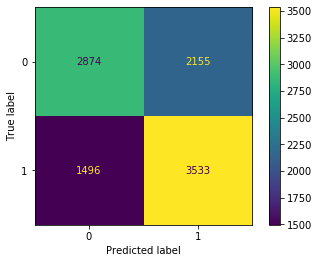

In [20]:
# Logistic Regression confusion matrix
lr_preds = lr.predict(X_train)
plot_confusion_matrix(lr, X_train, y_train)

In [21]:
# Hyperparameter optimization for Decision Tree Classifier
parameters = {
    'max_depth':[3, 4, 5, 6, 10, 15,20,30],
}
dtc = Pipeline([('CV',GridSearchCV(DecisionTreeClassifier(), parameters, cv = 5))])
dtc.fit(X_train, y_train)
dtc.named_steps['CV'].best_params_

{'max_depth': 30}

In [22]:
%%time
# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=30).fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=10, scoring="f1")
np.mean(dt_scores)

Wall time: 1.97 s


0.9855118449959399

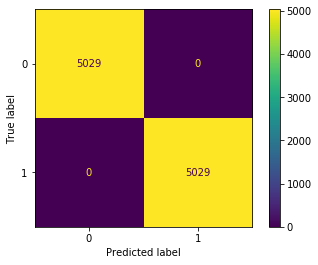

In [23]:
# Decision Tree Classifier confusion matrix
plot_confusion_matrix(dt, X_train, y_train)

In [24]:
%%time
# Hyperparameter optimization of RandomForestClassifier
parameters = {
    'max_depth':[3, 6,12,15,20],
    'n_estimators':[10, 20,30]
}
clf = Pipeline([('CV',GridSearchCV(RandomForestClassifier(), parameters, cv = 5))])
clf.fit(X_train, y_train)
clf.named_steps['CV'].best_params_

Wall time: 21.5 s


{'max_depth': 20, 'n_estimators': 30}

In [25]:
%%time
# RandomForestClassifier
rf = Pipeline([('rf', RandomForestClassifier(n_estimators = 10, max_depth = 20).fit(X_train, y_train))])
rf_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring="f1")
np.mean(rf_scores)

Wall time: 2.63 s


0.9925967882081022

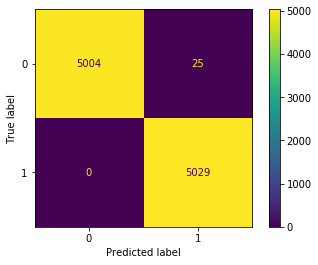

In [26]:
plot_confusion_matrix(rf, X_train, y_train)

Although the RandomForestClassifier had the highest accuracy, the confusion matrix showed the DecisionTreeClassifier truly had the higher accuracy because it has less false positives and negatives.

Therefore, I will be using the **DecisionTreeClassifier** as my **recommendation algorithm**.

### Using algorithm on test data 

In [27]:
# checking for imbalance
y_test.value_counts()

0    1252
1      15
Name: fav, dtype: int64

In [28]:
# Building a pipeline to use on regular data
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth=30))
pipe.fit(X_train, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=30))])

pipe.score(X_test, y_test)

0.9684293606945541

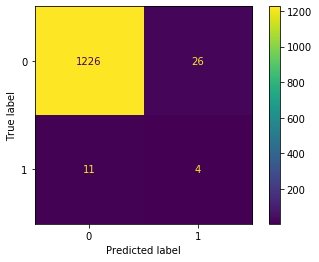

In [29]:
plot_confusion_matrix(dt, X_test, y_test)

After running evaluating the algorithm on test data, it shows there were seventeen false positives and negatives combined. It was able to correctly recommend 6 songs, but mislabeled 26 songs as future favorites; however, this might be a good thing. The algorithm only recommended 4 songs, but for the purpose of this project, I would like for there to be atleast 15 songs in the playlist. These false positives can mitigate the issue of not enough songs.

## Predicting songs and saving to dataset 

In [40]:
# Reloading the original dataframe to test the model on
df = pd.read_csv(r"C:\Users\Dhruv Kumar Jha\Downloads\Spotify_Analysis\2021_tracks.csv", encoding= 'unicode_escape')
df.head()

,id,name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,fav
0,0usLN2VpccZQwWkGLm3Odm,2013 Will Be My Year,0,161045,0.347,0.965,10,-6.014,1,0.1420,0.05040,0.000000,0.3430,0.392,90.987,0
1,1Nlstdx5q4GVUyaQqHYvqh,Inner City Life - 2020 Remaster,0,422183,0.384,0.889,7,-6.548,1,0.0936,0.00226,0.425000,0.0728,0.112,154.886,0
2,4BvreMl8IerW37NLYtBZ9e,Blow Your Mind (Mwah),0,178583,0.677,0.796,2,-4.761,0,0.1170,0.01880,0.000000,0.0948,0.494,108.851,0
3,4K9PNGfQMYnMsY9zEDKDLC,Break My Heart,0,352453,0.772,0.637,4,-7.846,0,0.0494,0.02200,0.035300,0.0898,0.409,113.022,0
4,5xZAMT6xqi8sXUHcccwzK2,Love Again,0,258004,0.659,0.667,11,-4.668,0,0.0339,0.00173,0.000028,0.1000,0.468,115.982,0


In [41]:
#Removing my favourites
df = df[df.fav == 0]
df

,id,name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,fav
0,0usLN2VpccZQwWkGLm3Odm,2013 Will Be My Year,0,161045,0.347,0.965,10,-6.014,1,0.1420,0.05040,0.000000,0.3430,0.392,90.987,0
1,1Nlstdx5q4GVUyaQqHYvqh,Inner City Life - 2020 Remaster,0,422183,0.384,0.889,7,-6.548,1,0.0936,0.00226,0.425000,0.0728,0.112,154.886,0
2,4BvreMl8IerW37NLYtBZ9e,Blow Your Mind (Mwah),0,178583,0.677,0.796,2,-4.761,0,0.1170,0.01880,0.000000,0.0948,0.494,108.851,0
3,4K9PNGfQMYnMsY9zEDKDLC,Break My Heart,0,352453,0.772,0.637,4,-7.846,0,0.0494,0.02200,0.035300,0.0898,0.409,113.022,0
4,5xZAMT6xqi8sXUHcccwzK2,Love Again,0,258004,0.659,0.667,11,-4.668,0,0.0339,0.00173,0.000028,0.1000,0.468,115.982,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6276,7ukyVwsO2iK0pczy90bBPx,Once In Royal Davids City,0,157884,0.798,0.286,6,-16.043,1,0.0554,0.66500,0.939000,0.1060,0.888,92.945,0
6277,6iJIak2oXRjhmFPdIFxasa,"Har Har Mahadev (From ""Har Har Mahadev"")",1,299366,0.452,0.732,1,-4.955,1,0.1450,0.28800,0.000000,0.2760,0.639,94.041,0
6278,3bEPbW5Xq4j5UtSO5nrKKs,Nic NeÅÃ­kÃ¡m,48,200312,0.804,0.452,0,-10.546,0,0.1030,0.37800,0.000002,0.4690,0.474,130.000,0
6279,1RFMAgFly5fMzdIjqpiaaL,Happy New Year 2021,0,188889,0.806,0.561,0,-9.545,1,0.0728,0.15500,0.000000,0.1580,0.694,108.005,0


Since the model has a very niche idea of what a favorite song is based on the favorites dataset, it is necessary to accept songs that might not be absolute favorites. This is done by using a threshold and sklearn's proba function.

I've defined the threshold as 0.3 to get approximately 20 song recommendations from nearly 10,000 songs to choose from. You can play with this value if you'd like more or less songs in the recommendation playlist.

In [42]:
# Predicting if a song is a favorite
prob_preds = pipe.predict_proba(df.drop(['fav','id','name'], axis=1))
threshold = 0.10 # define threshold here
preds = [1 if prob_preds[i][1]> threshold else 0 for i in range(len(prob_preds))]
df['prediction'] = preds

In [43]:
df['prediction'].value_counts()

0    6219
1      62
Name: prediction, dtype: int64

In [47]:
recommended_songs = df.loc[df['prediction'] == 1]

In [48]:
recommended_songs.to_csv('Recommended_songs.csv', index=True)

In [51]:
recommended_songs = pd.read_csv(r"C:\Users\Dhruv Kumar Jha\Downloads\Spotify_Analysis\recommended_songs.csv", encoding= 'unicode_escape')
recommended_songs

,Unnamed: 0,id,name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,fav,prediction
0,1038,41nXcbfyzMV9PCdv4slnkc,Girls Like You,19,215230,0.604,0.462,0,-7.053,1,0.0614,0.5580,0.000001,0.1310,0.378,60.260,0,1
1,1113,5hWSDV3aXFfW3OgtAOKOxp,ÃÂg var aÃÂ° spÃÂ¡,38,185266,0.696,0.685,6,-7.261,0,0.0402,0.1080,0.054100,0.0986,0.816,140.008,0,1
2,2058,0SZcGKzPpcY1m6kQytPo7f,Kom Naar Het Water - Live Uit Liefde Voor Muziek,41,197613,0.658,0.418,1,-11.494,1,0.0316,0.5910,0.000021,0.0829,0.545,139.880,0,1
3,2184,1mKg1S2CE0plkFkKRnZCwl,Mango - Extrait de la BO de ÃÂ« En Passant PÃ...,26,182933,0.800,0.866,2,-5.146,1,0.1110,0.1440,0.000006,0.1880,0.753,140.003,0,1
4,2389,5hb8HuFrA4KDxYYZ4bVvkA,Go Crazy,18,228000,0.660,0.577,6,-10.201,0,0.0788,0.0257,0.000003,0.1260,0.223,105.846,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,5619,3ZcMJ8Hlaib8Yw1gFuYrla,I Want It All,54,191835,0.615,0.730,1,-5.920,1,0.0361,0.0366,0.000002,0.1040,0.470,119.969,0,1
58,5854,3yaBstYCoYIfiQbAxTAxcT,Nena Buena,65,164494,0.705,0.703,6,-6.323,0,0.0600,0.3330,0.000002,0.2010,0.144,88.922,0,1
59,5919,0aQi1JGO1oKWEmKGfvf8TF,LA CANZONE NOSTRA Ã¢ÂÂ (con BLANCO & Salmo),77,237614,0.656,0.678,5,-6.851,0,0.0507,0.1200,0.000019,0.1470,0.166,129.871,0,1
60,5955,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.1500,0.472,149.996,0,1


In [52]:
recommended_songs.drop(recommended_songs.columns[[0]], axis = 1, inplace = True)

,id,name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,fav,prediction
0,41nXcbfyzMV9PCdv4slnkc,Girls Like You,19,215230,0.604,0.462,0,-7.053,1,0.0614,0.5580,0.000001,0.1310,0.378,60.260,0,1
1,5hWSDV3aXFfW3OgtAOKOxp,ÃÂg var aÃÂ° spÃÂ¡,38,185266,0.696,0.685,6,-7.261,0,0.0402,0.1080,0.054100,0.0986,0.816,140.008,0,1
2,0SZcGKzPpcY1m6kQytPo7f,Kom Naar Het Water - Live Uit Liefde Voor Muziek,41,197613,0.658,0.418,1,-11.494,1,0.0316,0.5910,0.000021,0.0829,0.545,139.880,0,1
3,1mKg1S2CE0plkFkKRnZCwl,Mango - Extrait de la BO de ÃÂ« En Passant PÃ...,26,182933,0.800,0.866,2,-5.146,1,0.1110,0.1440,0.000006,0.1880,0.753,140.003,0,1
4,5hb8HuFrA4KDxYYZ4bVvkA,Go Crazy,18,228000,0.660,0.577,6,-10.201,0,0.0788,0.0257,0.000003,0.1260,0.223,105.846,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,3ZcMJ8Hlaib8Yw1gFuYrla,I Want It All,54,191835,0.615,0.730,1,-5.920,1,0.0361,0.0366,0.000002,0.1040,0.470,119.969,0,1
58,3yaBstYCoYIfiQbAxTAxcT,Nena Buena,65,164494,0.705,0.703,6,-6.323,0,0.0600,0.3330,0.000002,0.2010,0.144,88.922,0,1
59,0aQi1JGO1oKWEmKGfvf8TF,LA CANZONE NOSTRA Ã¢ÂÂ (con BLANCO & Salmo),77,237614,0.656,0.678,5,-6.851,0,0.0507,0.1200,0.000019,0.1470,0.166,129.871,0,1
60,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.1500,0.472,149.996,0,1


In [54]:
recommended_songs

,id,name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,fav,prediction
0,41nXcbfyzMV9PCdv4slnkc,Girls Like You,19,215230,0.604,0.462,0,-7.053,1,0.0614,0.5580,0.000001,0.1310,0.378,60.260,0,1
1,5hWSDV3aXFfW3OgtAOKOxp,ÃÂg var aÃÂ° spÃÂ¡,38,185266,0.696,0.685,6,-7.261,0,0.0402,0.1080,0.054100,0.0986,0.816,140.008,0,1
2,0SZcGKzPpcY1m6kQytPo7f,Kom Naar Het Water - Live Uit Liefde Voor Muziek,41,197613,0.658,0.418,1,-11.494,1,0.0316,0.5910,0.000021,0.0829,0.545,139.880,0,1
3,1mKg1S2CE0plkFkKRnZCwl,Mango - Extrait de la BO de ÃÂ« En Passant PÃ...,26,182933,0.800,0.866,2,-5.146,1,0.1110,0.1440,0.000006,0.1880,0.753,140.003,0,1
4,5hb8HuFrA4KDxYYZ4bVvkA,Go Crazy,18,228000,0.660,0.577,6,-10.201,0,0.0788,0.0257,0.000003,0.1260,0.223,105.846,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,3ZcMJ8Hlaib8Yw1gFuYrla,I Want It All,54,191835,0.615,0.730,1,-5.920,1,0.0361,0.0366,0.000002,0.1040,0.470,119.969,0,1
58,3yaBstYCoYIfiQbAxTAxcT,Nena Buena,65,164494,0.705,0.703,6,-6.323,0,0.0600,0.3330,0.000002,0.2010,0.144,88.922,0,1
59,0aQi1JGO1oKWEmKGfvf8TF,LA CANZONE NOSTRA Ã¢ÂÂ (con BLANCO & Salmo),77,237614,0.656,0.678,5,-6.851,0,0.0507,0.1200,0.000019,0.1470,0.166,129.871,0,1
60,3Ofmpyhv5UAQ70mENzB277,Astronaut In The Ocean,98,132780,0.778,0.695,4,-6.865,0,0.0913,0.1750,0.000000,0.1500,0.472,149.996,0,1
